In [339]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm

from calendar import monthrange

import statsmodels.api as sm

import statsmodels.api as sm


In [179]:
data = pd.read_csv('monthly-milk-production.csv', sep = ';')

In [180]:
data.head()

,month,milk
0,01.01.1962,589
1,01.02.1962,561
2,01.03.1962,640
3,01.04.1962,656
4,01.05.1962,727


In [181]:
monthrange(1988,1)[1]

31

In [183]:
data.month[0][3:].split('.')[0]

'01'

In [184]:
data.month[0][3:].split('.')[1]

'1962'

In [39]:
pData.head()

,month
month,
01.01.1962,01.01.1962
01.02.1962,01.02.1962
01.03.1962,01.03.1962
01.04.1962,01.04.1962
01.05.1962,01.05.1962


In [152]:
pData = pd.DataFrame() 
a= []
b=[]

In [230]:
a = []
b = []
ii = 0
for i in data.month.values:
    a.append(i[3:])
    b.append(data.milk[ii] / monthrange(int(a[ii].split('.')[1]),int(a[ii].split('.')[0]))[1])
    ii = ii+1

In [303]:
pData = pd.DataFrame(b, a, columns = ["dMilk"])

In [304]:
pData.head()

,dMilk
01.1962,19.000000
02.1962,20.035714
03.1962,20.645161
04.1962,21.866667
05.1962,23.451613


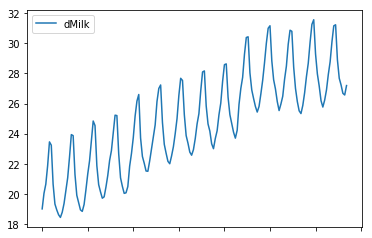

In [305]:
pData.plot()

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так:

milk.daily_diff1 = milk.daily - milk.daily.shift(1)

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:

    
milk.daily_diff12 = milk.daily - milk.daily.shift(12)

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

In [312]:
pData['ddiff1'] = pData.dMilk - pData.dMilk.shift(1)

In [313]:
pData.head()

,dMilk,ddiff1
01.1962,19.000000,NaN
02.1962,20.035714,1.035714
03.1962,20.645161,0.609447
04.1962,21.866667,1.221505
05.1962,23.451613,1.584946


In [314]:
notNaN = pData[np.isfinite(pData['ddiff1'])]
notNaN.head()

,dMilk,ddiff1
02.1962,20.035714,1.035714
03.1962,20.645161,0.609447
04.1962,21.866667,1.221505
05.1962,23.451613,1.584946
06.1962,23.233333,-0.218280


In [315]:
pData['ddiff12'] = pData.dMilk - pData.dMilk.shift(12)
pData.head()

,dMilk,ddiff1,ddiff12
01.1962,19.000000,NaN,NaN
02.1962,20.035714,1.035714,NaN
03.1962,20.645161,0.609447,NaN
04.1962,21.866667,1.221505,NaN
05.1962,23.451613,1.584946,NaN


In [316]:
pData['ddiff112'] = pData.ddiff1 - pData.dMilk.shift(12)
pData.head()

,dMilk,ddiff1,ddiff12,ddiff112
01.1962,19.000000,NaN,NaN,NaN
02.1962,20.035714,1.035714,NaN,NaN
03.1962,20.645161,0.609447,NaN,NaN
04.1962,21.866667,1.221505,NaN,NaN
05.1962,23.451613,1.584946,NaN,NaN


In [317]:
pData['ddiff121'] = pData.ddiff12 - pData.dMilk.shift(1)
pData.head()

,dMilk,ddiff1,ddiff12,ddiff112,ddiff121
01.1962,19.000000,NaN,NaN,NaN,NaN
02.1962,20.035714,1.035714,NaN,NaN,NaN
03.1962,20.645161,0.609447,NaN,NaN,NaN
04.1962,21.866667,1.221505,NaN,NaN,NaN
05.1962,23.451613,1.584946,NaN,NaN,NaN


In [318]:
pData['ddiffd12'] = pData.ddiff12 - pData.ddiff12.shift(1)
pData.head()

,dMilk,ddiff1,ddiff12,ddiff112,ddiff121,ddiffd12
01.1962,19.000000,NaN,NaN,NaN,NaN,NaN
02.1962,20.035714,1.035714,NaN,NaN,NaN,NaN
03.1962,20.645161,0.609447,NaN,NaN,NaN,NaN
04.1962,21.866667,1.221505,NaN,NaN,NaN,NaN
05.1962,23.451613,1.584946,NaN,NaN,NaN,NaN


In [320]:
notNaN = pData[np.isfinite(pData['ddiff12'])]

In [321]:
len(notNaN[notNaN.ddiff1 == np.nan])

0

In [322]:
len(notNaN[notNaN.ddiff121 == np.nan])

0

In [333]:
notNaN = pData[np.isfinite(pData['ddiffd12'])]

In [334]:
len(notNaN[notNaN.ddiffd12 == np.nan])

0

0.0916345596579109

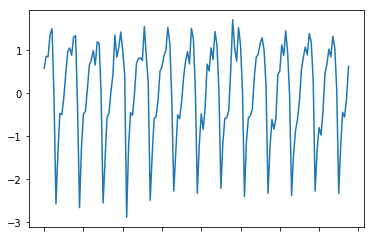

In [324]:
notNaN['ddiff1'].plot()
_, pval, *_ = sm.tsa.stattools.adfuller(notNaN['ddiff1'])
pval

0.22127672658830383

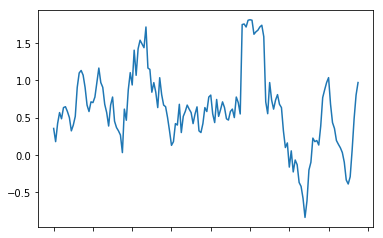

In [325]:
notNaN['ddiff12'].plot()
_, pval, *_ = sm.tsa.stattools.adfuller(notNaN['ddiff12'])
pval

2.2808455518036712e-06

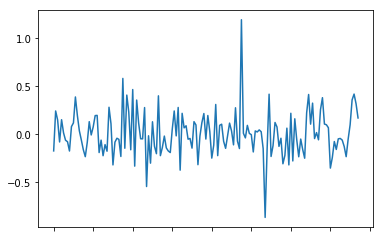

In [335]:
notNaN['ddiffd12'].plot()
_, pval, *_ = sm.tsa.stattools.adfuller(notNaN['ddiffd12'])
pval

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:

import statsmodels.api as sm

sm.graphics.tsa.plot_acf(ряд.values.squeeze(), lags=50)

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q Q в модели SARIMA?

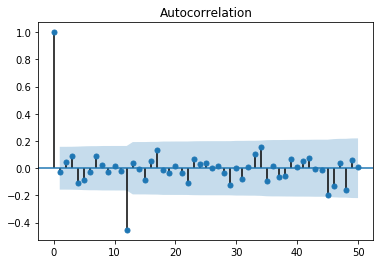

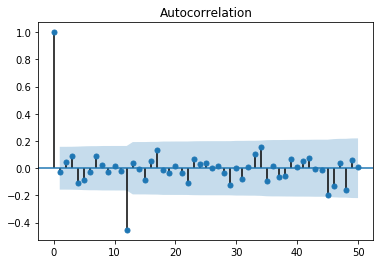

In [337]:
sm.graphics.tsa.plot_acf(notNaN['ddiffd12'].values.squeeze(), lags=50)

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Это можно сделать так:

import statsmodels.api as sm

sm.graphics.tsa.plot_pacf(ряд.values.squeeze(), lags=50)

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p p в модели SARIMA?

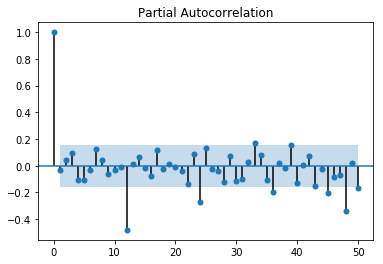

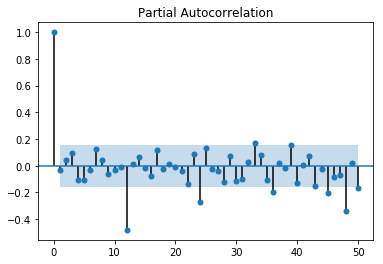

In [340]:
sm.graphics.tsa.plot_pacf(notNaN['ddiffd12'].values.squeeze(), lags=50)